In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 📦 Data Loading

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.shape

(145460, 23)

In [5]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### 📦 Separate features into categorical and numerical columns

In [8]:
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col) 
    else:
        numerical.append(col)            

In [9]:
print(f"Categorical Columns ({len(categorical)}): {categorical}")
print(f"Numerical Columns ({len(numerical)}): {numerical}")

Categorical Columns (7): ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Columns (16): ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [10]:
df.describe(include = ["object"])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2017-06-24,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [11]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [12]:
# Converts the Date column from string to datetime64 format.
df["Date"] = pd.to_datetime(df["Date"])

In [13]:

df["Date"]

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [14]:
# Extracts Year, Month, and Day as separate numeric columns.
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [15]:
# Drops the original Date column (no longer needed).
df.drop("Date", axis=1, inplace=True)

In [16]:
# Australian season feature (approximate)
# def get_season(month):
#     if month in [12, 1, 2]:
#         return "Summer"
#     elif month in [3, 4, 5]:
#         return "Autumn"
#     elif month in [6, 7, 8]:
#         return "Winter"
#     else:
#         return "Spring"

# df["Season"] = df["Month"].apply(get_season)

In [17]:
# Shape
df.shape

(145460, 25)

In [18]:
# check null values
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [19]:
# Show only columns with missing values, sorted descending
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)


Sunshine         69835
Evaporation      62790
Cloud3pm         59358
Cloud9am         55888
Pressure9am      15065
Pressure3pm      15028
WindDir9am       10566
WindGustDir      10326
WindGustSpeed    10263
Humidity3pm       4507
WindDir3pm        4228
Temp3pm           3609
RainTomorrow      3267
Rainfall          3261
RainToday         3261
WindSpeed3pm      3062
Humidity9am       2654
WindSpeed9am      1767
Temp9am           1767
MinTemp           1485
MaxTemp           1261
dtype: int64


In [20]:
# filling missing values in numerical columns with their mean
for col in numerical:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)
        print(f"Filled NaN in '{col}' with mean: {mean_value:.2f}")

C:\Users\CG-DTE\AppData\Local\Temp\ipykernel_14104\667613742.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


Filled NaN in 'MinTemp' with mean: 12.19
Filled NaN in 'MaxTemp' with mean: 23.22
Filled NaN in 'Rainfall' with mean: 2.36
Filled NaN in 'Evaporation' with mean: 5.47
Filled NaN in 'Sunshine' with mean: 7.61
Filled NaN in 'WindGustSpeed' with mean: 40.04
Filled NaN in 'WindSpeed9am' with mean: 14.04
Filled NaN in 'WindSpeed3pm' with mean: 18.66
Filled NaN in 'Humidity9am' with mean: 68.88
Filled NaN in 'Humidity3pm' with mean: 51.54
Filled NaN in 'Pressure9am' with mean: 1017.65
Filled NaN in 'Pressure3pm' with mean: 1015.26
Filled NaN in 'Cloud9am' with mean: 4.45
Filled NaN in 'Cloud3pm' with mean: 4.51
Filled NaN in 'Temp9am' with mean: 16.99
Filled NaN in 'Temp3pm' with mean: 21.68


In [21]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,WNW,...,1007.1,8.000000,4.50993,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,WSW,...,1007.8,4.447461,4.50993,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,WSW,...,1008.7,4.447461,2.00000,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,E,...,1012.8,4.447461,4.50993,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,NW,...,1006.0,7.000000,8.00000,17.8,29.7,No,No,2008,12,5


In [22]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [23]:
# Rebuild column type lists after removing Date
categorical = []
numerical = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical.append(col)
    else:
        numerical.append(col)


In [24]:
# Fill Nulls in Categorical Columns with Mode
for col in categorical:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled NaN in '{col}' with mode: {mode_value}")


C:\Users\CG-DTE\AppData\Local\Temp\ipykernel_14104\4199085063.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


Filled NaN in 'WindGustDir' with mode: W
Filled NaN in 'WindDir9am' with mode: N
Filled NaN in 'WindDir3pm' with mode: SE
Filled NaN in 'RainToday' with mode: No
Filled NaN in 'RainTomorrow' with mode: No


In [25]:
print(f"✅ Total remaining missing values: {df.isnull().sum().sum()}")

✅ Total remaining missing values: 0


In [26]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [27]:
# Check duplocates
num_duplicates = df.duplicated().sum()
print(f"🔁 Number of duplicate rows: {num_duplicates}")

🔁 Number of duplicate rows: 0


In [28]:
# If duplicates exist, you can drop them with
df.drop_duplicates(inplace=True)
print("✅ Duplicate rows removed.")

✅ Duplicate rows removed.


### 📊 Exploratory Data Analysis (EDA)

In [29]:
# Basic Overview
print(f"Shape: {df.shape}")
print(df.dtypes.value_counts())        # Count of datatypes
df.describe().T.head()                 # Statistical summary
df["RainTomorrow"].value_counts()     # Class balance

Shape: (145460, 25)
float64    16
object      6
int32       3
Name: count, dtype: int64


RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64

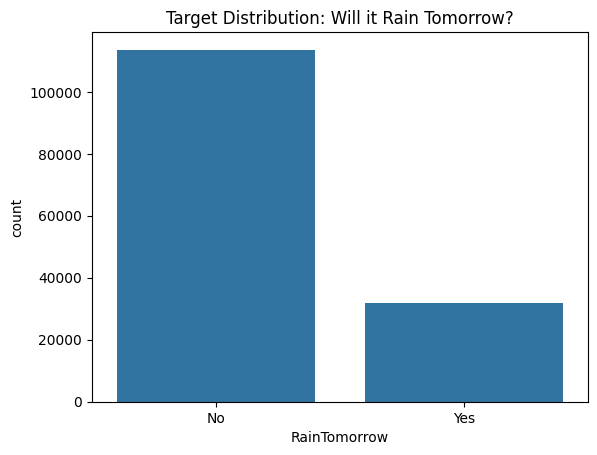

RainTomorrow
No     0.780854
Yes    0.219146
Name: proportion, dtype: float64

In [30]:
# Target Variable Distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="RainTomorrow")
plt.title("Target Distribution: Will it Rain Tomorrow?")
plt.show()

# Class ratio
df["RainTomorrow"].value_counts(normalize=True)

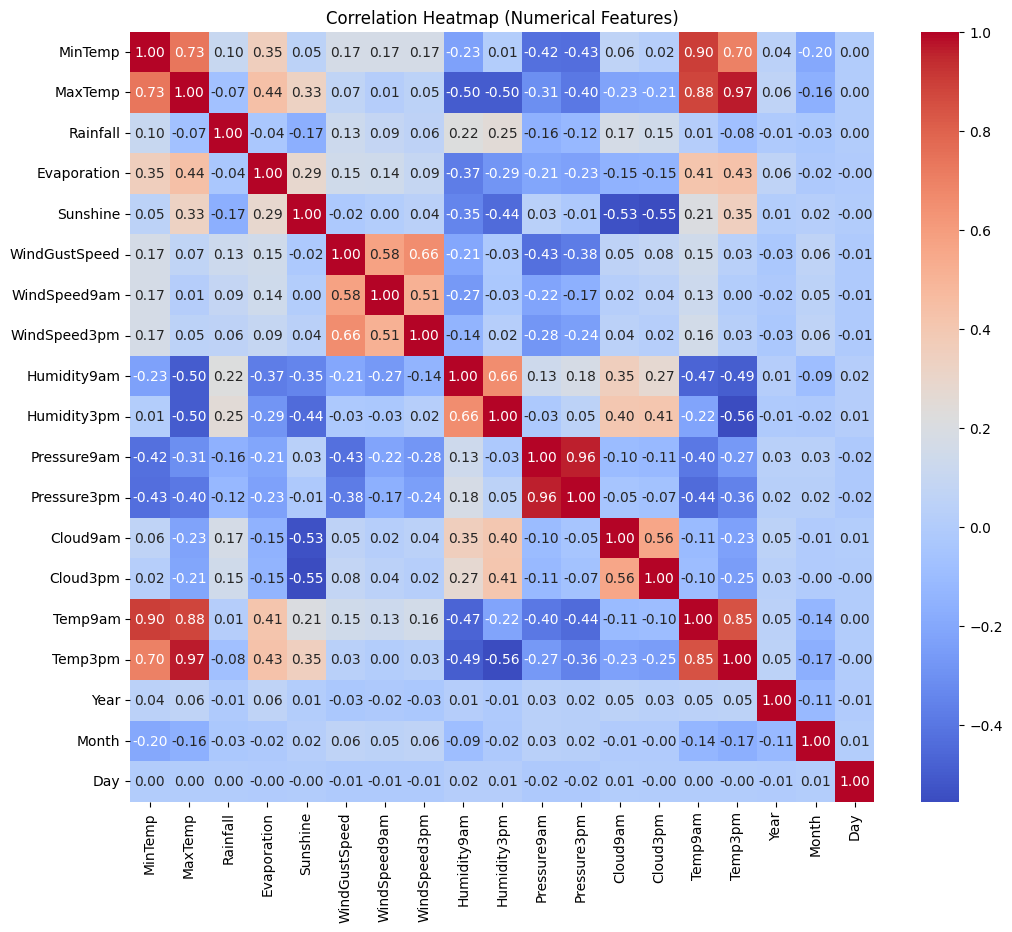

In [31]:
# Correlation Heatmap (Numerical)
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


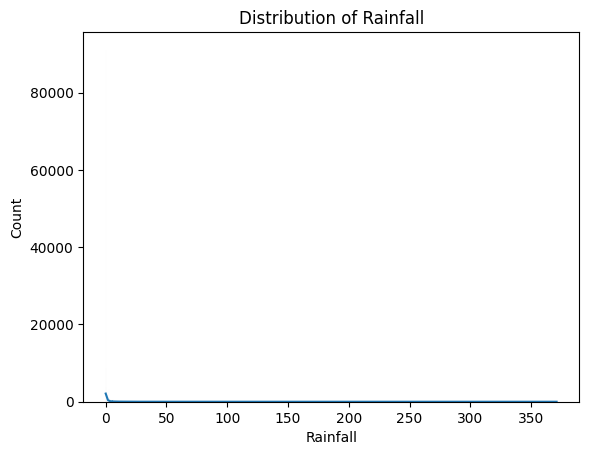

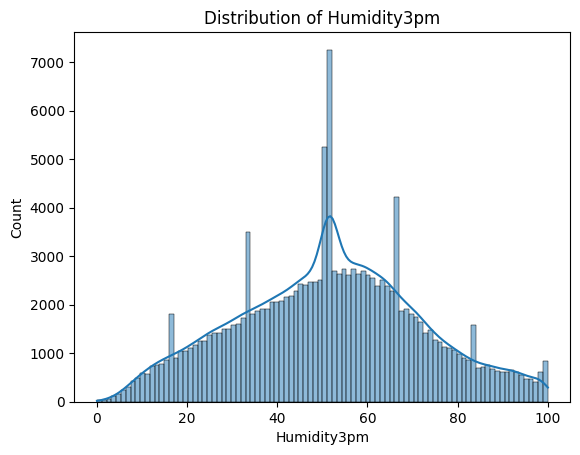

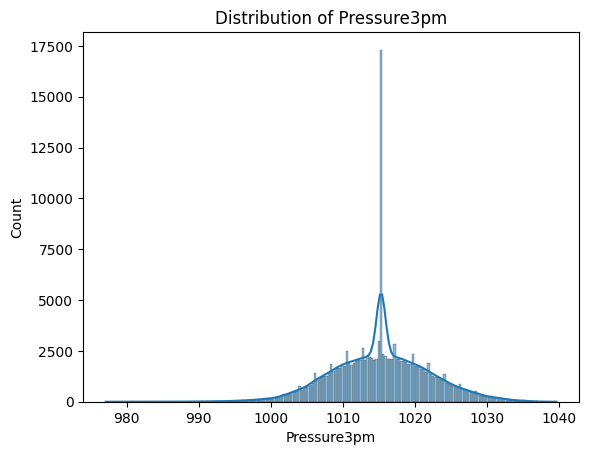

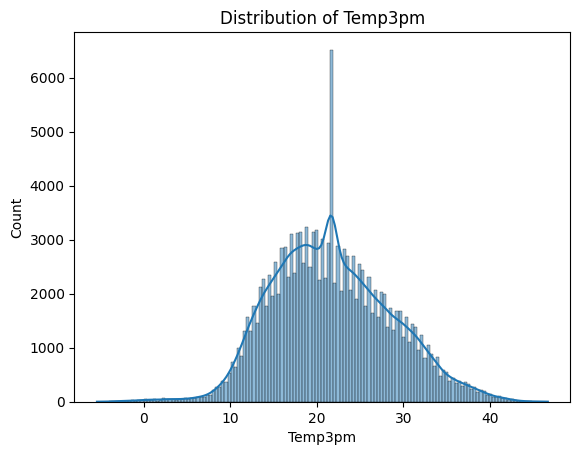

In [32]:
# Distribution of Key Numerical Features
for col in ["Rainfall", "Humidity3pm", "Pressure3pm", "Temp3pm"]:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


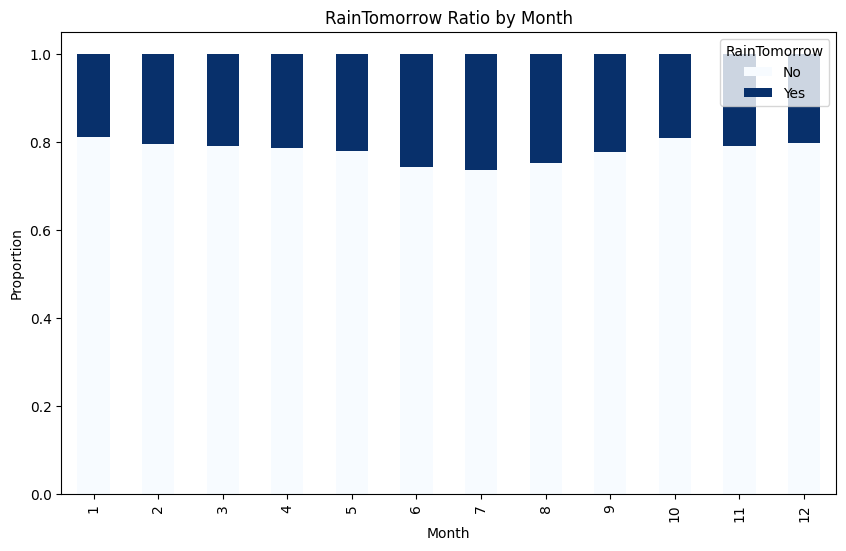

In [33]:
#  Rain by Month or Season
# Rain chance per month
rain_per_month = df.groupby("Month")["RainTomorrow"].value_counts(normalize=True).unstack()
rain_per_month.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="Blues")
plt.title("RainTomorrow Ratio by Month")
plt.ylabel("Proportion")
plt.show()

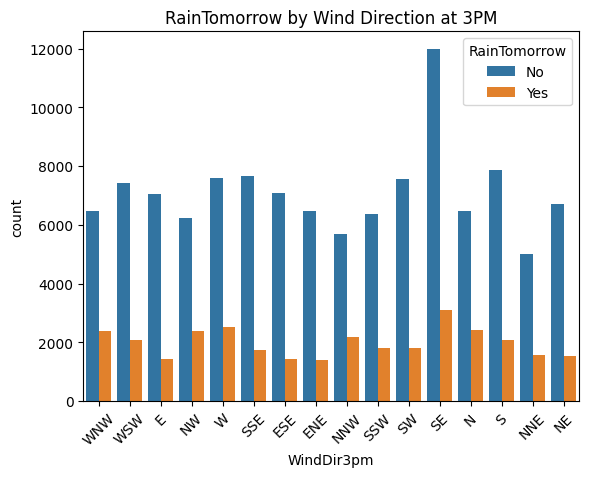

In [34]:
# Categorical Features vs Target
# Categorical impact (e.g., WindDir3pm)
sns.countplot(data=df, x="WindDir3pm", hue="RainTomorrow")
plt.xticks(rotation=45)
plt.title("RainTomorrow by Wind Direction at 3PM")
plt.show()


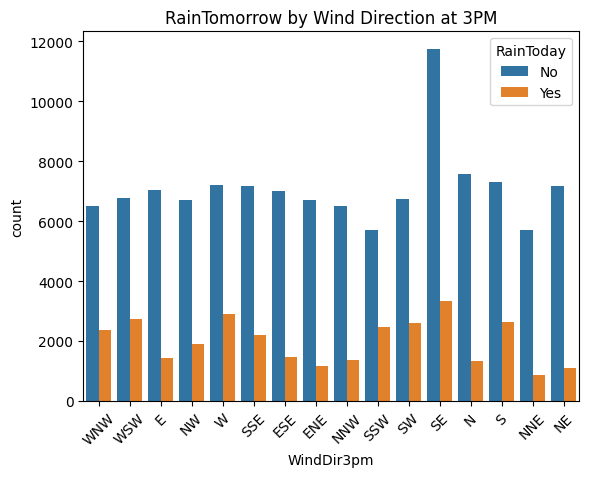

In [35]:
sns.countplot(data=df, x="WindDir3pm", hue="RainToday")
plt.xticks(rotation=45)
plt.title("RainTomorrow by Wind Direction at 3PM")
plt.show()

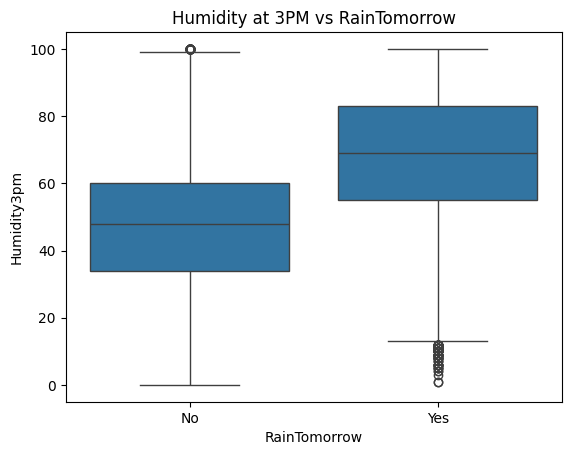

In [36]:
# Boxplots for Rain vs Numerical
# Example: Humidity3pm by RainTomorrow
sns.boxplot(data=df, x="RainTomorrow", y="Humidity3pm")
plt.title("Humidity at 3PM vs RainTomorrow")
plt.show()

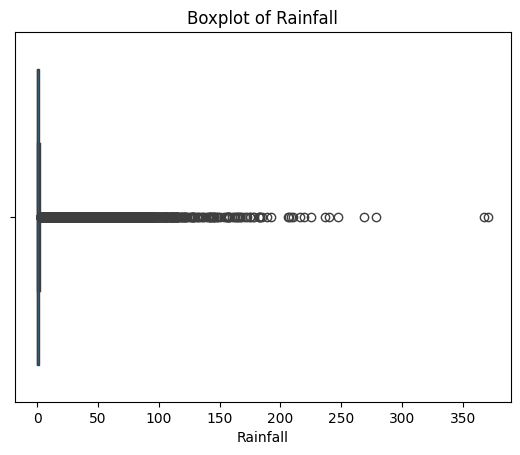

In [37]:
# Outlier Detection
sns.boxplot(x=df["Rainfall"])
plt.title("Boxplot of Rainfall")
plt.show()


### DATA PROCESSING

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:

# Create a dictionary to store encoders if needed later
encoders = {}

for col in categorical:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    
    # Save encoder for inverse_transform or deployment
    encoders[col] = label_encoder
    
    # Print mapping for reference
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"🔤 Label mapping for '{col}': {label_mapping}")


🔤 Label mapping for 'Location': {'Adelaide': np.int64(0), 'Albany': np.int64(1), 'Albury': np.int64(2), 'AliceSprings': np.int64(3), 'BadgerysCreek': np.int64(4), 'Ballarat': np.int64(5), 'Bendigo': np.int64(6), 'Brisbane': np.int64(7), 'Cairns': np.int64(8), 'Canberra': np.int64(9), 'Cobar': np.int64(10), 'CoffsHarbour': np.int64(11), 'Dartmoor': np.int64(12), 'Darwin': np.int64(13), 'GoldCoast': np.int64(14), 'Hobart': np.int64(15), 'Katherine': np.int64(16), 'Launceston': np.int64(17), 'Melbourne': np.int64(18), 'MelbourneAirport': np.int64(19), 'Mildura': np.int64(20), 'Moree': np.int64(21), 'MountGambier': np.int64(22), 'MountGinini': np.int64(23), 'Newcastle': np.int64(24), 'Nhil': np.int64(25), 'NorahHead': np.int64(26), 'NorfolkIsland': np.int64(27), 'Nuriootpa': np.int64(28), 'PearceRAAF': np.int64(29), 'Penrith': np.int64(30), 'Perth': np.int64(31), 'PerthAirport': np.int64(32), 'Portland': np.int64(33), 'Richmond': np.int64(34), 'Sale': np.int64(35), 'SalmonGums': np.int64(3

In [40]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,0.6,5.468232,7.611178,13,44.0,13,14,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,0.0,5.468232,7.611178,14,44.0,6,15,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,0.0,5.468232,7.611178,15,46.0,13,15,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,0.0,5.468232,7.611178,4,24.0,9,0,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,1.0,5.468232,7.611178,13,41.0,1,7,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int64  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  int64  
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  int64  
 9   WindDir3pm     145460 non-null  int64  
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Pressure3pm    145460 non-null  float64
 16  Cloud9am       145460 non-null  float64
 17  Cloud3pm       145460 non-nul

### Select input features and target variable

In [42]:
X = df.drop('RainTomorrow', axis=1)  # All input features
Y = df["RainTomorrow"]               # Target variable (0 or 1)

In [43]:
print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")
print("Target distribution:\n", Y.value_counts(normalize=True))

X shape: (145460, 24)
Y shape: (145460,)
Target distribution:
 RainTomorrow
0    0.780854
1    0.219146
Name: proportion, dtype: float64


### Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [45]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (116368, 24)
Test shape: (29092, 24)


In [46]:
# To preserve class distribution (important for imbalanced datasets like this), use:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [47]:
# Check class balance in both sets
print("Train target distribution:\n", y_train.value_counts(normalize=True))
print("Test target distribution:\n", y_test.value_counts(normalize=True))

Train target distribution:
 RainTomorrow
0    0.78085
1    0.21915
Name: proportion, dtype: float64
Test target distribution:
 RainTomorrow
0    0.780868
1    0.219132
Name: proportion, dtype: float64


### Model Training

In [48]:
import xgboost as xgb

# Create and train the model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [49]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"📈 Training Accuracy: {train_accuracy:.4f}")
print(f"📉 Testing Accuracy:  {test_accuracy:.4f}")

📈 Training Accuracy: 0.8896
📉 Testing Accuracy:  0.8622


### Model Evaluation

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict
y_pred = model.predict(X_test)

# Accuracy
print("✅ Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification report
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8621957926577754

📉 Confusion Matrix:
 [[21517  1200]
 [ 2809  3566]]

🧾 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     22717
           1       0.75      0.56      0.64      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.75      0.78     29092
weighted avg       0.85      0.86      0.85     29092



### Save Metrics (Accuracy, Precision, Recall, F1, ROC-AUC) to CSV

In [53]:
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Needed for ROC AUC

# Metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_prob)
}

# Convert to DataFrame
metrics_df = pd.DataFrame([metrics])

# Save to CSV
os.makedirs("artifacts/metrics", exist_ok=True)
metrics_df.to_csv("artifacts/metrics/model_metrics.csv", index=False)
print("✅ Model metrics saved to artifacts/metrics/model_metrics.csv")
metrics_df

✅ Model metrics saved to artifacts/metrics/model_metrics.csv


,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.862196,0.748217,0.559373,0.640158,0.892886


### Confusion Matrix Plot

C:\Users\CG-DTE\AppData\Local\Temp\ipykernel_14104\1240916499.py:10: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig("artifacts/metrics/confusion_matrix.png")


<Figure size 600x500 with 0 Axes>

d:\Mlops_course_2025\Mlops_new_course\MLOPS-PROJECTS\MLOPS_RainFlux_project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


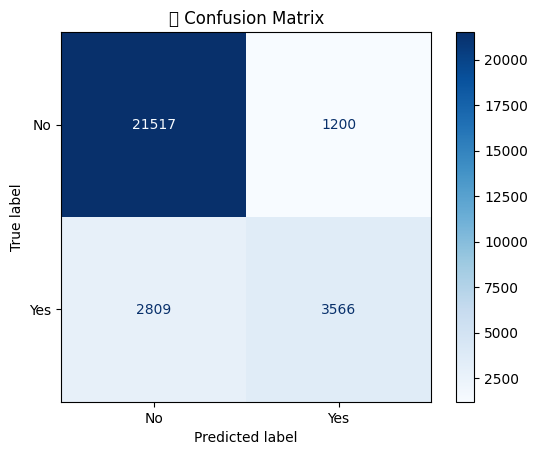

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("📊 Confusion Matrix")
plt.savefig("artifacts/metrics/confusion_matrix.png")
plt.show()


### ROC Curve Plot

C:\Users\CG-DTE\AppData\Local\Temp\ipykernel_14104\3708132249.py:13: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.savefig("artifacts/metrics/roc_curve.png")
d:\Mlops_course_2025\Mlops_new_course\MLOPS-PROJECTS\MLOPS_RainFlux_project\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


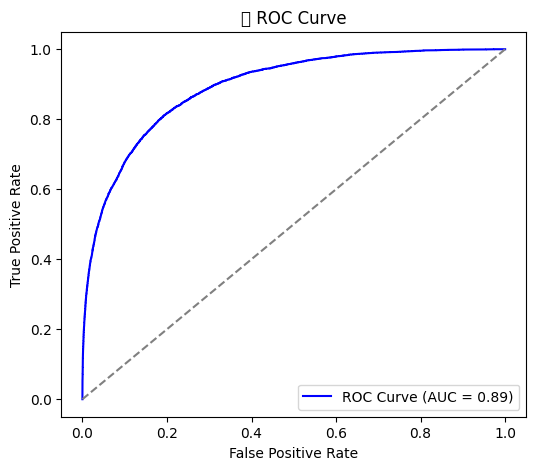

In [55]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("🔵 ROC Curve")
plt.legend(loc="lower right")
plt.savefig("artifacts/metrics/roc_curve.png")
plt.show()


### Save Model

In [56]:
import joblib
os.makedirs("artifacts/model", exist_ok=True)
joblib.dump(model, "artifacts/model/model.pkl")
print("✅ Model saved to artifacts/model/model.pkl")

✅ Model saved to artifacts/model/model.pkl


### Feature Importance Plot

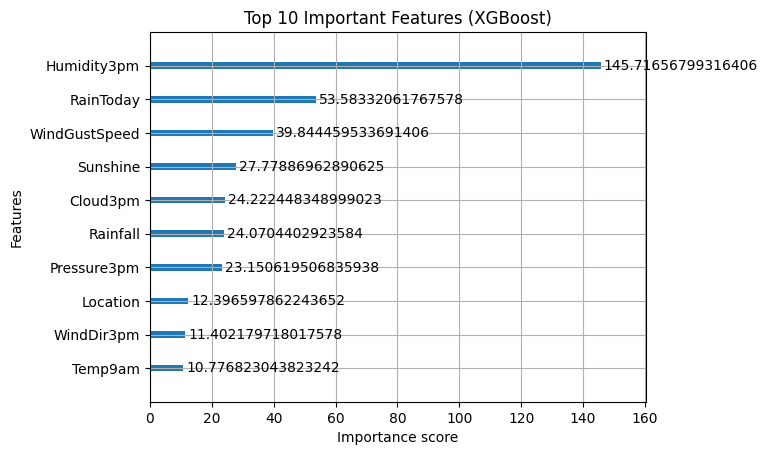

In [57]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Important Features (XGBoost)")
plt.show()
